# Broadband/Grad Rate Data Analysis

## The FCC defines broadband service as 25Mbps down, any lower is considered an unserved area. Is there a correlation between access to broadband and graduation rates? I ran the numbers in a variety of ways to find out.

(Kate Mikkelson)

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# Import broadband stats and grad rate data
broadband = pd.read_csv("Resources/mn_broadband_stats.csv")
grad_data = pd.read_csv("Resources/district_grouped_mean.csv")

In [4]:
# Merge on census block
merged_data = pd.merge(broadband, grad_data, on="BLOCK")

# Save to CSV
merged_data.to_csv('Resources/broadband_and_gradrates.csv')
merged_data.head()

KeyError: 'BLOCK'

In [ ]:
# Check Correlations

max_broadband = merged_data['Max Down']
mean_broadband = merged_data['Mean Down']
fcc_high = merged_data['Max Down'] >= 25
fcc_low = merged_data['Max Down'] < 25
grad_rate = merged_data['Four Year Percent']
print("------------")
print('Coefficient of Max Speed vs. Grad Rate')
print(np.corrcoef(max_broadband, grad_rate))
print('Coefficient of Mean Speed vs. Grad Rate')
print(np.corrcoef(mean_broadband, grad_rate))
print('Coefficient of FCC Highspeed Census Blocks vs. Grad Rate')
print(np.corrcoef(fcc_high, grad_rate))
print('Coefficient of FCC Lowspeed Census Blocks vs. Grad Rate')
print(np.corrcoef(fcc_low, grad_rate))
print("------------")


# Check grad rates of schools in FCC High and Low speed Census Blocks
fcc_low_blocks = merged_data.loc[merged_data['Max Down'] < 25, :]
fcc_high_blocks = merged_data.loc[merged_data['Max Down'] >= 25, :]

low_mean_grad_rate = fcc_low_blocks['Four Year Percent'].mean()
high_mean_grad_rate = fcc_high_blocks['Four Year Percent'].mean()
overall_mean = merged_data['Four Year Percent'].mean()
print("Mean grad rate in low speed blocks: " + str(low_mean_grad_rate))
print("Mean grad rate in high speed blocks: " + str(high_mean_grad_rate))
print("Mean grad rate in all blocks: " + str(overall_mean))
print("------------")


#Get the coefficient of determination from your data (Ashley helped with this code to make stats uniform)

from sklearn.linear_model import LinearRegression
broadband_co = np.array(merged_data["Max Down"]).reshape((-1, 1))
gradvariable = np.array(merged_data["Four Year Percent"]) 
yourmodel = LinearRegression().fit(broadband_co, gradvariable)
your_r_sq = yourmodel.score(broadband_co, gradvariable)
print('Coefficient of Determination (Max Down Speed & Grad Rate:', your_r_sq)

In [5]:
# Graduation Rates in areas with broadband speeds below the FCC Threshold for Highspeed

# Grab just blocks where the max down is below the FCC threshold
fcc_low_blocks = merged_data.loc[merged_data['Max Down'] < 25, :]
fcc_low_blocks.head()

# Grab necessary data as variables for ease of use
fcc_low_speeds = fcc_low_blocks['Max Down']
fcc_low_grad = fcc_low_blocks['Four Year Percent']

# Check correlation coefficient
print('Low')
print(np.corrcoef(fcc_low_speeds, fcc_low_grad))

# Set axes
x_axis = fcc_low_speeds
y_axis = fcc_low_grad

# Set up scatter plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="cornflowerblue", edgecolors="black")
         
# Set limits
plt.xlim((min(fcc_low_speeds)-1), (max(fcc_low_speeds)+1))
plt.ylim((min(grad_rate)-5), (max(grad_rate)+5))
         
# Set titles, labels, formatting
plt.title("Graduation Rates in areas with broadband speeds below the FCC Threshold for Highspeed")
plt.grid(alpha=.5)
plt.xlabel('Max Download Speed')
plt.ylabel('Four Year Percent')

# Show plot and save as .png
plt.savefig("Images/fcc_low_gradrates.png")
plt.show()


NameError: name 'merged_data' is not defined

In [6]:
# Graduation Rates in areas with broadband speeds below the FCC Threshold for Highspeed

# Grab just blocks where the max down is below the FCC threshold
fcc_high_blocks = merged_data.loc[merged_data['Max Down'] >= 25, :]
fcc_high_blocks.head()

# Grab necessary data as variables for ease of use
fcc_high_speeds = fcc_high_blocks['Max Down']
fcc_high_grad = fcc_high_blocks['Four Year Percent']

# Check correlation coefficient
print('Low')
print(np.corrcoef(fcc_high_speeds, fcc_high_grad))

# Set axes
x_axis = fcc_high_speeds
y_axis = fcc_high_grad

# Set up scatter plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="cornflowerblue", edgecolors="black")
         
# Set limits
plt.xlim((min(fcc_high_speeds)-1), (max(fcc_high_speeds)+1))
plt.ylim((min(grad_rate)-5), (max(grad_rate)+5))
         
# Set titles, labels, formatting
plt.title("Graduation Rates in areas with broadband speeds above the FCC Threshold for Highspeed")
plt.grid(alpha=.5)
plt.xlabel('Max Download Speed')
plt.ylabel('Four Year Percent')

# Show plot and save as .png
plt.savefig("Images/fcc_high_gradrates.png")
plt.show()


NameError: name 'merged_data' is not defined

In [7]:
plt.scatter(fcc_high_speeds, fcc_high_grad, color='green', edgecolors="black", label=">= 25MBps")
plt.scatter(fcc_low_speeds, fcc_low_grad, color='red', edgecolors="black", label="<25MBps")

plt.title("Graduation Rate Based on Max Download Speed\nAbove and Below FCC Broadband Threshold")
plt.xlabel("Max Download Speed of Census Block (MBps)")
plt.ylabel("Four Year Graduation Percentage")
plt.legend(loc="lower center")
plt.grid(alpha=.5)

#Federal Accountability Threshold for Graduation
plt.plot([0,1000], [67,67], color='r', linestyle='--', linewidth=1) 
#plt.annotate('Federal Accountability Threshold', xy=(420, 160), xycoords='figure points')
plt.savefig("Images/gradrates_by_highlow.png")
plt.show()


NameError: name 'fcc_high_speeds' is not defined

In [8]:
# Scatter plot comparing max internet speeds to graduation rates

# Grab necessary data as variables for ease of use
max_broadband = merged_data['Max Down']
grad_rate = merged_data['Four Year Percent']

# Set axes
x_axis = max_broadband
y_axis = grad_rate

# Set up scatter plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="cornflowerblue", edgecolors="black")
         
# Set limits
plt.xlim((min(max_broadband)-5), (max(max_broadband)+5))
plt.ylim((min(grad_rate)-5), (max(grad_rate)+5))
         
# Set titles, labels, formatting
plt.title("Access to high speed internet vs. Graduation Rates")
plt.grid(alpha=.5)
plt.xlabel('Max Download Speed')
plt.ylabel('Four Year Percent')

# Show plot and save as .png
plt.savefig("Images/max_broadband_gradrates.png")
plt.show()


NameError: name 'merged_data' is not defined

In [77]:
# Find max speeds above and below the FCC designation of high speed (25MBps)
merged_data['FCC Designation'] = ""

mask = merged_data['Max Down'] >= 25
merged_data['FCC Designation'] = np.where(mask, 'High', 'Low')

merged_data.head()
merged_data['FCC Designation'].value_counts()

High    254185
Low       2256
Name: FCC Designation, dtype: int64

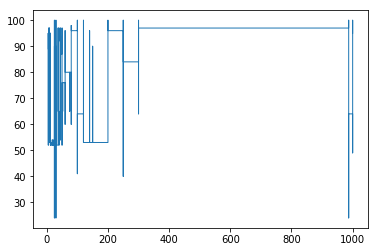

<Figure size 720x576 with 0 Axes>

In [78]:
# Attempting a simpler line chart
grad_rate = merged_data['Four Year Percent']
speed = sorted(merged_data['Max Down'])

plt.plot(speed, grad_rate, linewidth=1)
plt.figure(figsize=(10,8))

plt.savefig("Images/maxdown_grad_line.png")
plt.show()
